In [86]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [87]:
file_path = 'assessment_da25.csv'
data = pd.read_csv(file_path)
df.head()

,Variant,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id
0,A,5,0.0,0,2,74,0
1,A,4,0.0,4,1,21,1
2,A,4,0.0,2,0,1,2
3,A,5,0.0,0,1,26,3
4,A,5,0.0,3,3,46,4


In [88]:
#understanding the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Variant                2000 non-null   object 
 1   Number of page views   2000 non-null   int64  
 2   GMV (in $)             2000 non-null   float64
 3   Number of add to cart  2000 non-null   int64  
 4   Clicks on media        2000 non-null   int64  
 5   Time on Page (sec)     2000 non-null   int64  
 6   user_id                2000 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 109.5+ KB


In [89]:
# Counting the amount of data in each group
n_users_A = df[df['Variant'] == 'A']['user_id'].value_counts().sum()
n_users_B = df[df['Variant'] == 'B']['user_id'].value_counts().sum()

In [90]:
print("Number of users in group A:", n_users_A)
print("Number of users in group B:", n_users_B)

Number of users in group A: 1000
Number of users in group B: 1000


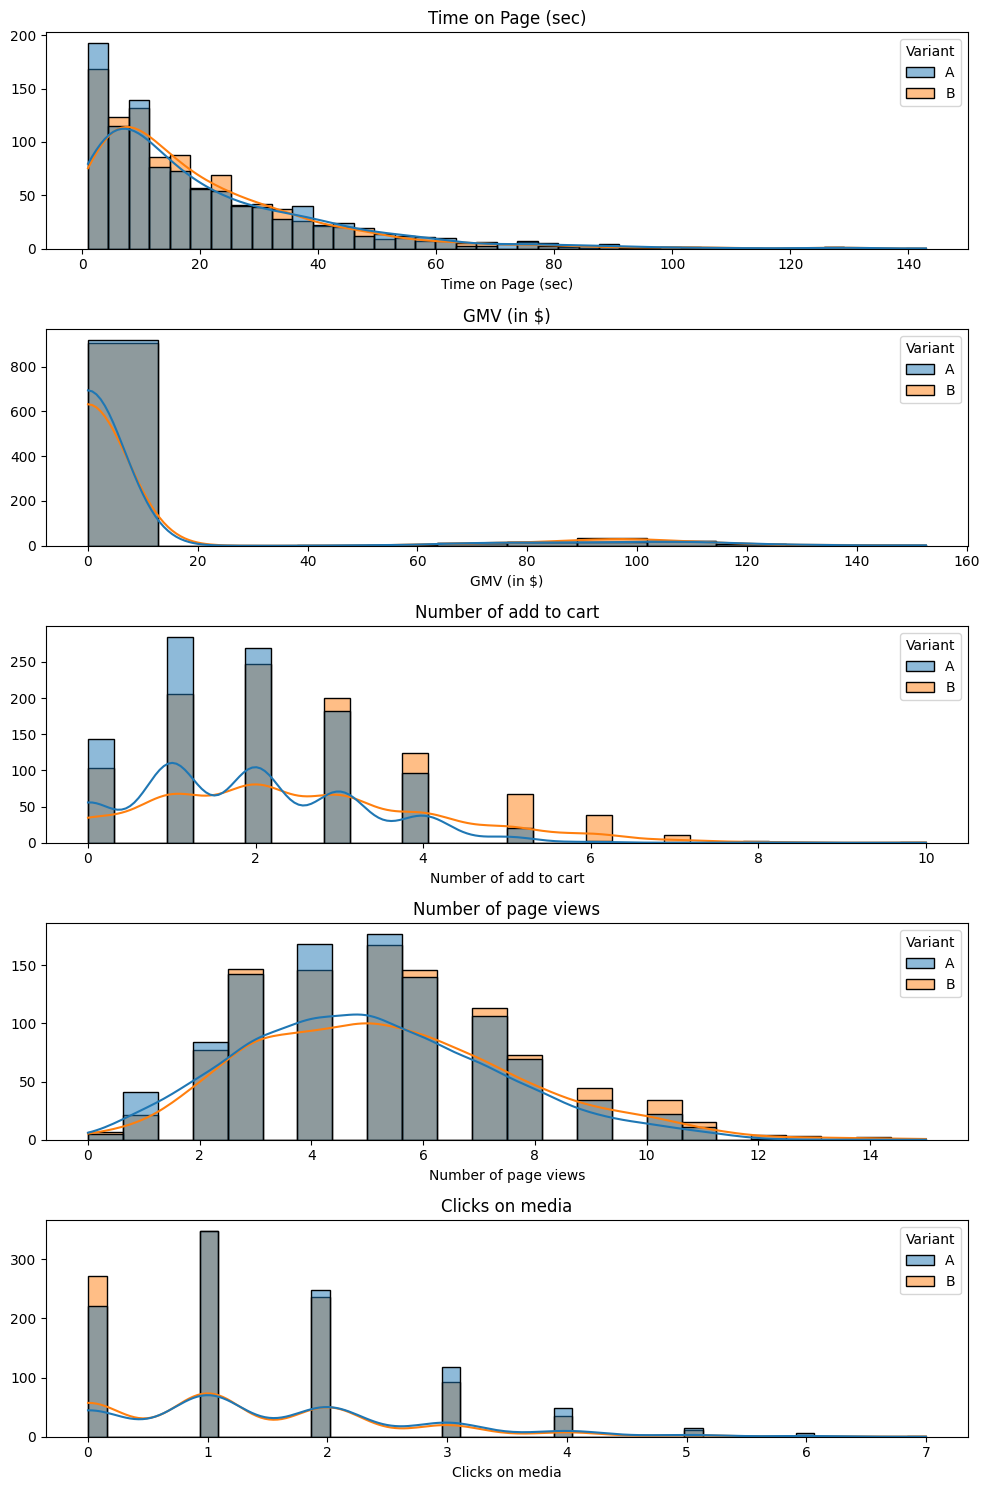

In [91]:
# Visualising the data
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ['Time on Page (sec)', 'GMV (in $)', 'Number of add to cart', 'Number of page views', 'Clicks on media']

fig, axes = plt.subplots(len(metrics), 1, figsize=(10, 15))

for i, metric in enumerate(metrics):
    sns.histplot(ax=axes[i], x=metric, hue='Variant', data=df, kde=True, legend=True)
    axes[i].set_title(metric)
    axes[i].set_xlabel(metric)
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()


In [92]:
#Concrete figures for the two metrics chosen

In [93]:
# Calculate average values for GMV and Number of add to cart for each variant
average_values = df.groupby('Variant')[['GMV (in $)', 'Number of add to cart']].mean()

# Rename the column 'Number of add to cart' to 'ATC'
average_values.rename(columns={'Number of add to cart': 'ATC'}, inplace=True)

# Access the average GMV values for each variant
average_gmv_A = average_values.loc['A', 'GMV (in $)']
average_gmv_B = average_values.loc['B', 'GMV (in $)']

# Access the average ATC values for each variant
average_atc_A = average_values.loc['A', 'ATC']
average_atc_B = average_values.loc['B', 'ATC']

# Print the results
print("Average GMV (in $) for Variant A:", average_gmv_A)
print("Average GMV (in $) for Variant B:", average_gmv_B)

print("Average ATC for Variant A:", average_atc_A)
print("Average ATC for Variant B:", average_atc_B)


Average GMV (in $) for Variant A: 7.68999
Average GMV (in $) for Variant B: 9.289530000000001
Average ATC for Variant A: 1.884
Average ATC for Variant B: 2.469


In [94]:
from scipy.stats import ttest_ind

# Assuming you have separate data for Variant A and Variant B in variables gmv_a and gmv_b

# Perform t-test
t_test_result = ttest_ind(gmv_a, gmv_b)

# Extract p-value
p_value = t_test_result.pvalue

# Check if p-value is less than 0.05
if p_value < 0.05:
    print("There is a statistically significant difference.")
else:
    print("There is no statistically significant difference.")
    # Print the t-test result
print("T-test result (p-value):", p_value)


There is no statistically significant difference.
T-test result (p-value): nan


In [95]:
from scipy.stats import ttest_ind

# Extract the GMV values for each variant
gmv_A = df[df['Variant'] == 'A']['GMV (in $)']
gmv_B = df[df['Variant'] == 'B']['GMV (in $)']

# Perform the t-test
t_statistic, p_value = ttest_ind(gmv_A, gmv_B)

# Print the results
print("T-statistic:", t_statistic)
print("p-value:", p_value)

# Check for statistical significance
if p_value < 0.05:
    print("There is a statistically significant difference in GMV between the two variants.")
else:
    print("There is no statistically significant difference in GMV between the two variants.")


T-statistic: -1.2839539769831623
p-value: 0.19930692918202245
There is no statistically significant difference in GMV between the two variants.


In [96]:
from scipy.stats import ttest_ind

# Extract the ATC values for each variant
atc_A = df[df['Variant'] == 'A']['Number of add to cart']
atc_B = df[df['Variant'] == 'B']['Number of add to cart']

# Perform the t-test
t_statistic, p_value = ttest_ind(atc_A, atc_B)

# Print the results
print("T-statistic:", t_statistic)
print("p-value:", p_value)

# Check for statistical significance
if p_value < 0.05:
    print("There is a statistically significant difference in ATC between the two variants.")
else:
    print("There is no statistically significant difference in ATC between the two variants.")


T-statistic: -8.777389396187946
p-value: 3.517078745065221e-18
There is a statistically significant difference in ATC between the two variants.
